#**Maximum Temperature forecasting on Each Day  (univariate analysis)**

---

In [1]:
#importing all the basic libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_data=pd.read_csv("/content/jena_climate_2009_2016.csv",parse_dates=["Date Time"],index_col=0)

In [3]:
df_data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df=pd.DataFrame(df_data.loc[:,"T (degC)"])
df.head(10)

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-01 00:20:00,-8.41
2009-01-01 00:30:00,-8.51
2009-01-01 00:40:00,-8.31
2009-01-01 00:50:00,-8.27
2009-01-01 01:00:00,-8.05
2009-01-01 01:10:00,-7.62
2009-01-01 01:20:00,-7.62
2009-01-01 01:30:00,-7.91


In [5]:
df.index

DatetimeIndex(['2009-01-01 00:10:00', '2009-01-01 00:20:00',
               '2009-01-01 00:30:00', '2009-01-01 00:40:00',
               '2009-01-01 00:50:00', '2009-01-01 01:00:00',
               '2009-01-01 01:10:00', '2009-01-01 01:20:00',
               '2009-01-01 01:30:00', '2009-01-01 01:40:00',
               ...
               '2009-12-14 04:00:00', '2009-12-14 04:10:00',
               '2009-12-14 04:20:00', '2009-12-14 04:30:00',
               '2009-12-14 04:40:00', '2009-12-14 04:50:00',
               '2009-12-14 05:00:00', '2009-12-14 05:10:00',
               '2009-12-14 05:20:00', '2009-12-14 05:30:00'],
              dtype='datetime64[ns]', name='Date Time', length=49999, freq=None)

In [6]:
df_fil=df["T (degC)"].resample("D").max()

In [7]:
df1=pd.DataFrame(df_fil)
df1.head()

,T (degC)
Date Time,
2009-01-01,-4.17
2009-01-02,-2.50
2009-01-03,12.17
2009-01-04,13.38
2009-01-05,17.42


In [8]:
df1.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2009-12-05', '2009-12-06', '2009-12-07', '2009-12-08',
               '2009-12-09', '2009-12-10', '2009-12-11', '2009-12-12',
               '2009-12-13', '2009-12-14'],
              dtype='datetime64[ns]', name='Date Time', length=348, freq='D')

In [9]:
df1.shape

(348, 1)

In [10]:
df1.describe()

,T (degC)
count,348.000000
mean,13.811034
std,8.562897
min,-10.880000
25%,7.172500
50%,14.005000
75%,20.582500
max,32.980000


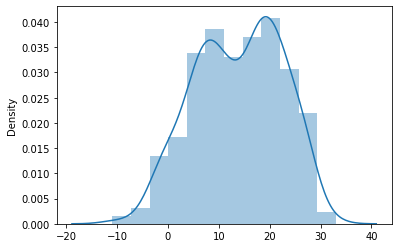

In [11]:
sns.distplot(df1)

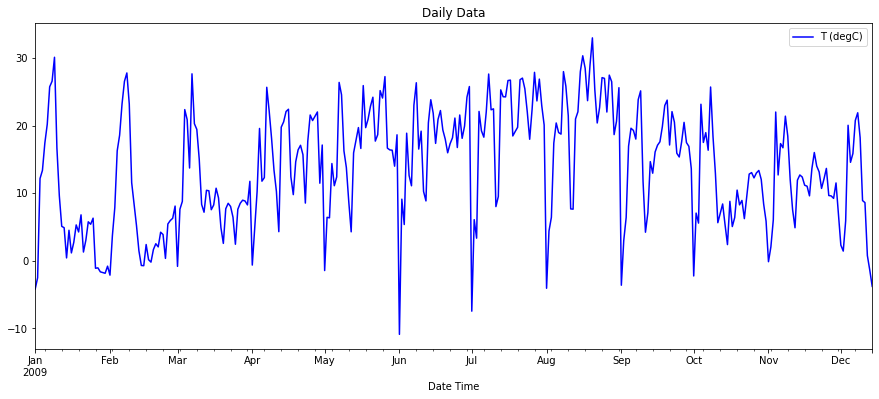

In [12]:
df1.plot(figsize=(15,6),title="Daily Data",color="blue")

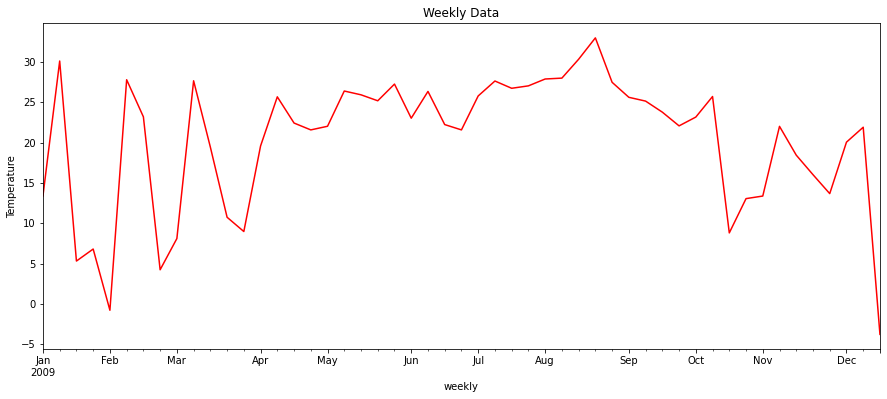

In [13]:
df_fil_Week=df["T (degC)"].resample("W").max()
df_fil_Week.plot(figsize=(15,6),xlabel="weekly",ylabel="Temperature",color="red",title="Weekly Data")

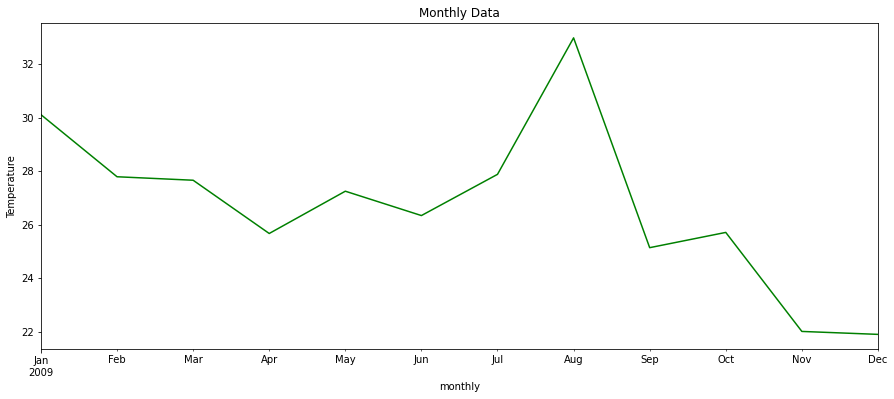

In [14]:
df_fil_MS=df["T (degC)"].resample("MS").max()
df_fil_MS.plot(figsize=(15,6),xlabel="monthly",ylabel="Temperature",color="green",title="Monthly Data")

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

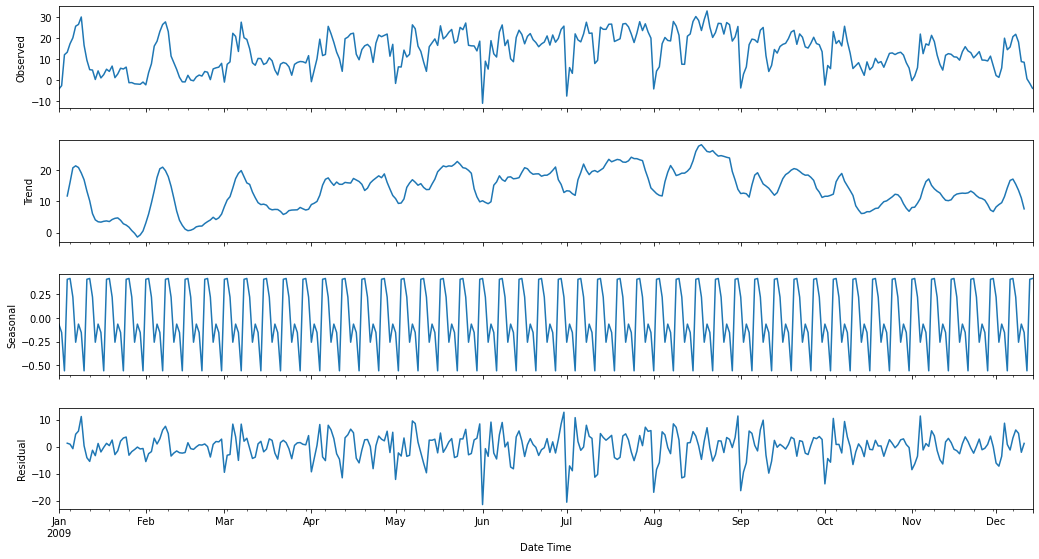

In [16]:
result = seasonal_decompose(df1['T (degC)'])
fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(16,9)

<Figure size 432x288 with 0 Axes>

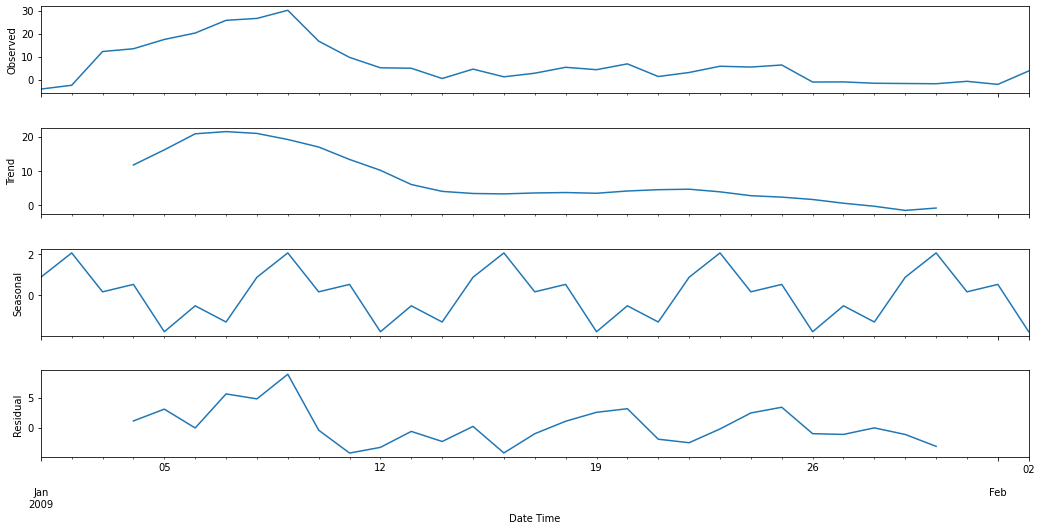

In [17]:
result = seasonal_decompose(df1['T (degC)'][:33])
fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(16, 9)

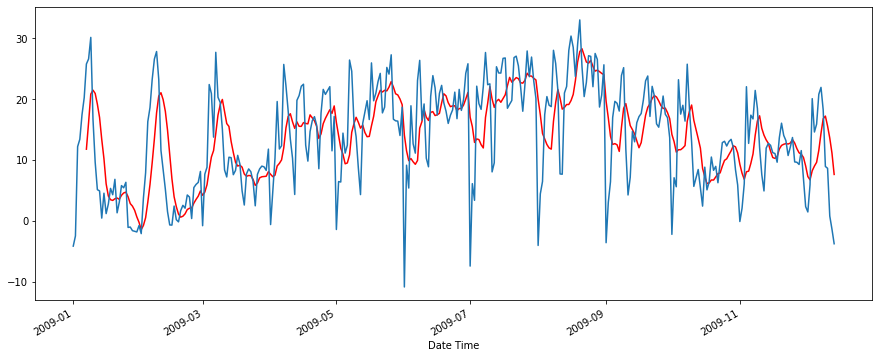

In [18]:
plt.figure(figsize=(15, 6))
rollmean=df1["T (degC)"].rolling(window=7).mean()
plt.plot(rollmean,color="red",label="mean");
df1["T (degC)"].plot()

#HOLT-WINTERS Triple Smoothing

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
model_HW = ExponentialSmoothing(df1["T (degC)"][0:279],trend="add",seasonal="add", seasonal_periods=30)
fitted_model=model_HW.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [21]:
print(fitted_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  279
Model:             ExponentialSmoothing   SSE                          12777.178
Optimized:                         True   AIC                           1134.953
Trend:                         Additive   BIC                           1258.414
Seasonal:                      Additive   AICC                          1145.961
Seasonal Periods:                    30   Date:                 Fri, 14 Jan 2022
Box-Cox:                          False   Time:                         13:44:14
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0524976                alpha                 True
smoothing_slope          

In [22]:
df1["forecast_HW"]=fitted_model.predict(start=279,end=349)

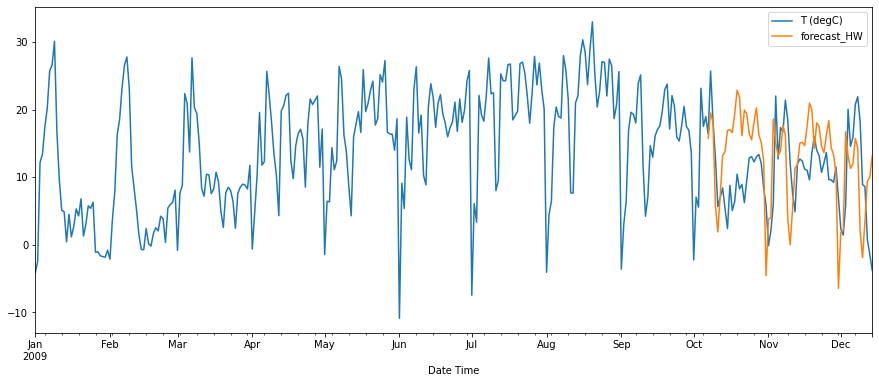

In [23]:
df1[['T (degC)','forecast_HW']].plot(figsize=(15,6))

In [24]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) *100 # MAPE    
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':round(mape,2),
            'mae': round(mae,2), 
            'rmse':round(rmse,2)}) 

In [25]:
forecast_accuracy(df1['forecast_HW'][279:349],df1["T (degC)"][279:349])

{'mae': 6.32, 'mape': 148.09, 'rmse': 7.74}

In [26]:
ind=pd.date_range(start='2009-12-14', end='2010-01-13', freq='D')

In [27]:
future_dataset=pd.DataFrame(index=ind,columns=df1.columns)

In [28]:
ind.shape

(31,)

In [29]:
future_df=pd.concat([df1,future_dataset])

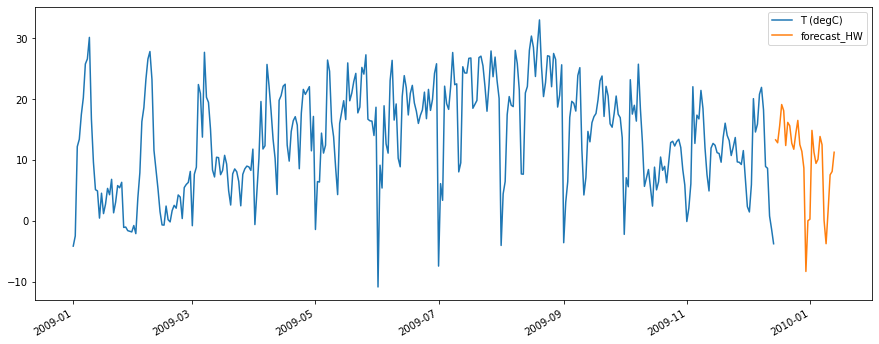

In [30]:
future_df['forecast_HW'] = fitted_model.predict(start = 348, end = 381)  
future_df[['T (degC)', 'forecast_HW']].plot(figsize=(15, 6)) 

#SARIMA

In [31]:
from statsmodels.tsa.stattools import adfuller
test=adfuller(df1["T (degC)"],autolag="AIC")
print("p value:",test[1])

p value: 0.008380537576624289


In [32]:
adfuller(df1["T (degC)"])

(-3.4850092938784054,
 0.008380537576624289,
 8,
 339,
 {'1%': -3.4497880749874628,
  '10%': -2.571332495975496,
  '5%': -2.870103829170425},
 2117.9652595602083)

In [33]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

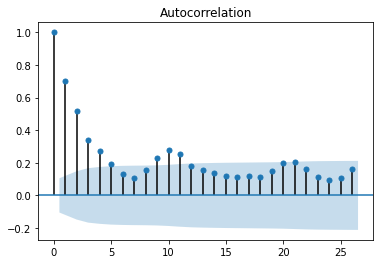

In [34]:
plot_acf(df1["T (degC)"]); #MA

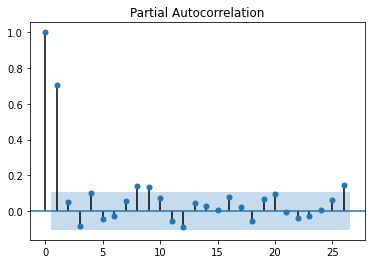

In [35]:
plot_pacf(df1["T (degC)"]); #Autoregressive

In [36]:
import statsmodels.api as sm

In [37]:
model_sarima=sm.tsa.statespace.SARIMAX(df1["T (degC)"][0:279],order=(1, 1, 1),seasonal_order=(1,1,1,30))
results=model_sarima.fit()

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           T (degC)   No. Observations:                  279
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood                -816.282
Date:                            Fri, 14 Jan 2022   AIC                           1642.565
Time:                                    13:44:28   BIC                           1660.132
Sample:                                01-01-2009   HQIC                          1649.637
                                     - 10-06-2009                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3927      0.067      5.878      0.000       0.262       0.524
ma.L1         -0.9546      0.033    -29.132      0.000      -1.019      -0.890
ar.S.L30       0.3870      0.129      3.009      0.003       0.135       0.639
ma.S.L30      -0.8191      0.127     -6.446      0.000      -1.068      -0.570
sigma2        39.5436      3.313     11.937      0.000      33.051      46.036
===================================================================================
Ljung-Box (Q):                       62.07   Jarque-Bera (JB):                88.35
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -0.76
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

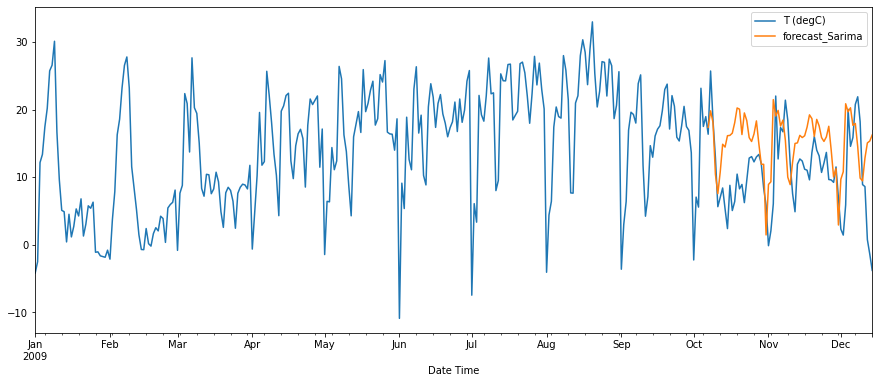

In [39]:
df1['forecast_Sarima']=results.predict(start=279,end=349)
df1[['T (degC)','forecast_Sarima']].plot(figsize=(15,6))

In [40]:
forecast_accuracy(df1['forecast_Sarima'][279:349],df1["T (degC)"][279:349])

{'mae': 6.0, 'mape': 232.35, 'rmse': 7.46}

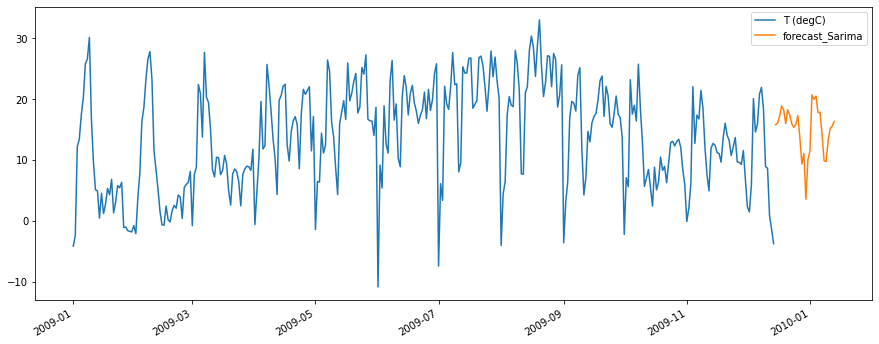

In [41]:
future_df['forecast_Sarima'] = results.predict(start = 348, end = 381)  
future_df[['T (degC)', 'forecast_Sarima']].plot(figsize=(15, 6)) 

#RNN using LSTM

In [42]:
import tensorflow
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [43]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [44]:
dataset=min_max_scaler.fit_transform(df1['T (degC)'].values.reshape(-1,1))

In [45]:
train_size=int(len(dataset)*0.7)

In [46]:
test_size=len(dataset)-train_size

In [47]:
train=dataset[0:train_size,:]

In [48]:
test=dataset[train_size:len(dataset),:]

In [49]:
train.shape

(243, 1)

In [50]:
def create_dataset(dataset,time_step=6):
    x_ind,y_dep =[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        x_ind.append(a)
        y_dep.append(dataset[i+time_step,0])
    return np.array(x_ind),np.array(y_dep)

In [51]:
x_train,y_train=create_dataset(train,time_step=6)

In [52]:
x_test,y_test=create_dataset(test,time_step=6)

In [53]:
x_train.shape,x_test.shape

((236, 6), (98, 6))

In [54]:
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))

In [55]:
x_train.shape

(236, 1, 6)

In [56]:
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [57]:
x_test.shape

(98, 1, 6)

In [58]:
from keras.layers.core import Dense,Dropout,Activation
from keras.layers.recurrent import LSTM

In [59]:
time_step=6
model_lstm=Sequential()

In [60]:
model_lstm.add(LSTM(20,input_shape=(1,time_step)))
model_lstm.add(Dense(1))

In [61]:
model_lstm.compile(loss="mean_squared_error",optimizer='adam')

In [62]:
model_lstm.fit(x_train,y_train,epochs=150)

Epoch 1/150
8/8 [==============================] - 3s 5ms/step - loss: 0.3058
Epoch 2/150
8/8 [==============================] - 0s 4ms/step - loss: 0.2456
Epoch 3/150
8/8 [==============================] - 0s 4ms/step - loss: 0.1902
Epoch 4/150
8/8 [==============================] - 0s 4ms/step - loss: 0.1456
Epoch 5/150
8/8 [==============================] - 0s 4ms/step - loss: 0.1061
Epoch 6/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0763
Epoch 7/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0544
Epoch 8/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0410
Epoch 9/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0339
Epoch 10/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0315
Epoch 11/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 12/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 13/150
8/8 [==============================] - 0s 4ms/st

In [63]:
y_pred=model_lstm.predict(x_test)

In [64]:
y_pred

array([[0.6558838 ],
       [0.6447787 ],
       [0.7390895 ],
       [0.7697768 ],
       [0.5483289 ],
       [0.39998746],
       [0.46606216],
       [0.5749153 ],
       [0.54229164],
       [0.5749954 ],
       [0.63286996],
       [0.63904095],
       [0.6626204 ],
       [0.7233074 ],
       [0.7371093 ],
       [0.6316904 ],
       [0.6856321 ],
       [0.6999246 ],
       [0.59766793],
       [0.57627237],
       [0.6365347 ],
       [0.67320406],
       [0.62919056],
       [0.6118983 ],
       [0.57713556],
       [0.34509036],
       [0.41562292],
       [0.465379  ],
       [0.6493752 ],
       [0.64091897],
       [0.6322931 ],
       [0.6268095 ],
       [0.7646153 ],
       [0.66652715],
       [0.5392821 ],
       [0.44462863],
       [0.46269482],
       [0.47391754],
       [0.42735052],
       [0.37467614],
       [0.46575737],
       [0.44118282],
       [0.42037404],
       [0.49777094],
       [0.48699996],
       [0.4695999 ],
       [0.45460743],
       [0.488

In [65]:
y_pred=min_max_scaler.inverse_transform(y_pred)

In [66]:
y_pred

array([[17.887064 ],
       [17.399996 ],
       [21.536465 ],
       [22.882412 ],
       [13.169704 ],
       [ 6.66345  ],
       [ 9.561486 ],
       [14.335785 ],
       [12.904911 ],
       [14.339298 ],
       [16.877676 ],
       [17.148336 ],
       [18.182531 ],
       [20.844261 ],
       [21.449614 ],
       [16.825941 ],
       [19.191824 ],
       [19.818693 ],
       [15.333715 ],
       [14.395307 ],
       [17.038412 ],
       [18.64673  ],
       [16.7163   ],
       [15.95786  ],
       [14.433166 ],
       [ 4.2556634],
       [ 7.349221 ],
       [ 9.531523 ],
       [17.601597 ],
       [17.230705 ],
       [16.852375 ],
       [16.611864 ],
       [22.656027 ],
       [18.353882 ],
       [12.772912 ],
       [ 8.621411 ],
       [ 9.413795 ],
       [ 9.906024 ],
       [ 7.863594 ],
       [ 5.5532956],
       [ 9.548119 ],
       [ 8.470279 ],
       [ 7.5576053],
       [10.952233 ],
       [10.479818 ],
       [ 9.716652 ],
       [ 9.059082 ],
       [10.54

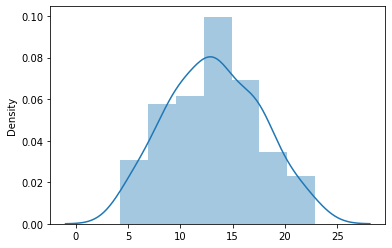

In [67]:
sns.distplot(y_pred)

In [68]:
y_test=np.expand_dims(y_test,axis=1)

In [69]:
y_test=min_max_scaler.inverse_transform(y_test)

In [70]:
y_test

array([[18.01],
       [23.85],
       [25.14],
       [11.73],
       [ 4.23],
       [ 7.12],
       [14.67],
       [12.96],
       [16.1 ],
       [17.1 ],
       [17.61],
       [19.84],
       [22.97],
       [23.77],
       [17.13],
       [22.07],
       [20.51],
       [15.91],
       [15.36],
       [17.61],
       [20.48],
       [17.49],
       [16.93],
       [13.63],
       [-2.24],
       [ 7.06],
       [ 5.58],
       [23.16],
       [17.51],
       [18.96],
       [16.36],
       [25.71],
       [18.39],
       [12.93],
       [ 5.64],
       [ 7.03],
       [ 8.41],
       [ 5.33],
       [ 2.4 ],
       [ 8.8 ],
       [ 5.07],
       [ 6.4 ],
       [10.46],
       [ 8.28],
       [ 8.93],
       [ 6.24],
       [ 9.6 ],
       [12.83],
       [13.05],
       [12.27],
       [13.  ],
       [13.37],
       [12.03],
       [ 8.4 ],
       [ 5.87],
       [-0.13],
       [ 2.07],
       [ 6.06],
       [22.01],
       [12.7 ],
       [17.34],
       [16.72],
       [

In [71]:
def plot_pred(test,predicted):
    plt.figure(figsize=(15, 6))
    plt.plot(test,color='red',label='Actual Temperature')
    plt.plot(predicted,color='blue',label="RNN predicted Temperature")
    plt.xlabel('Time')
    plt.ylabel("Temperature")
    plt.legend()
    plt.show()

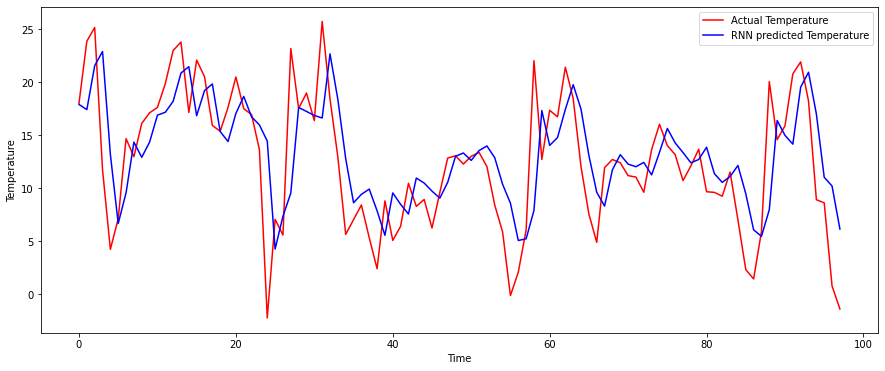

In [72]:
plot_pred(y_test,y_pred)

In [73]:
forecast_accuracy(y_pred,y_test)

{'mae': 3.57, 'mape': 130.43, 'rmse': 4.82}

In [74]:
df2=pd.DataFrame(df_fil)

In [75]:
df2.head()

,T (degC)
Date Time,
2009-01-01,-4.17
2009-01-02,-2.50
2009-01-03,12.17
2009-01-04,13.38
2009-01-05,17.42


In [76]:
forecast_dataset = np.array(df2)
forecast_dataset =forecast_dataset.reshape(-1, 1)
forecast_dataset.shape

(348, 1)

In [77]:
x_348=min_max_scaler.transform(forecast_dataset)
Samples=58
TimeSteps=6
Features=1
x_348=x_348.reshape(Samples,Features,TimeSteps)
x_348.shape

(58, 1, 6)

In [78]:
predicted_temp = model_lstm.predict(x_348)
predicted_temp = min_max_scaler.inverse_transform(predicted_temp)
predicted_temp

array([[18.596222 ],
       [ 8.112314 ],
       [ 7.118237 ],
       [ 7.744785 ],
       [ 2.0339556],
       [16.843147 ],
       [ 9.608998 ],
       [ 3.9833684],
       [ 6.625389 ],
       [ 4.9568863],
       [22.906317 ],
       [11.435148 ],
       [ 7.725727 ],
       [ 6.60004  ],
       [12.059102 ],
       [12.273337 ],
       [ 7.453776 ],
       [10.548926 ],
       [15.7634735],
       [14.960164 ],
       [12.512312 ],
       [ 7.1505547],
       [19.772907 ],
       [22.24309  ],
       [14.275651 ],
       [12.609923 ],
       [13.60215  ],
       [19.449621 ],
       [17.080225 ],
       [21.352934 ],
       [17.261026 ],
       [11.307593 ],
       [24.487797 ],
       [22.276997 ],
       [22.400463 ],
       [14.394166 ],
       [19.0366   ],
       [26.607277 ],
       [17.415518 ],
       [24.057667 ],
       [10.432763 ],
       [22.882412 ],
       [14.339298 ],
       [16.825941 ],
       [18.64673  ],
       [ 9.531523 ],
       [18.353882 ],
       [ 5.55

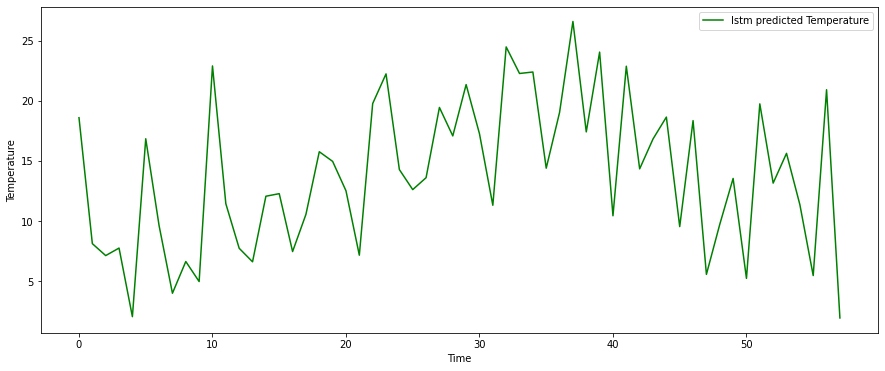

In [79]:
plt.figure(figsize=(15, 6))
plt.plot(predicted_temp,color='green',label="lstm predicted Temperature")
plt.xlabel('Time')
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [80]:
ind1=pd.date_range(start='2009-12-14', end='2010-02-09', freq='D')
ind1.shape

(58,)

In [81]:
new_dataframe=pd.DataFrame(index=ind1)

In [82]:
new_dataframe["predicted_lstm"]=predicted_temp

In [83]:
new_dataframe.head()

,predicted_lstm
2009-12-14,18.596222
2009-12-15,8.112314
2009-12-16,7.118237
2009-12-17,7.744785
2009-12-18,2.033956


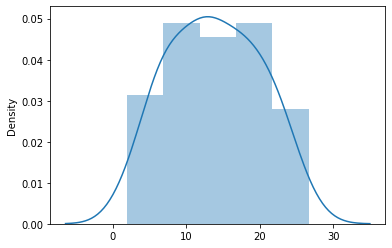

In [84]:
sns.distplot(new_dataframe)

In [85]:
forecast_df=pd.concat([df2,new_dataframe])

In [86]:
forecast_df

,T (degC),predicted_lstm
2009-01-01,-4.17,NaN
2009-01-02,-2.50,NaN
2009-01-03,12.17,NaN
2009-01-04,13.38,NaN
2009-01-05,17.42,NaN
...,...,...
2010-02-05,NaN,15.628353
2010-02-06,NaN,11.362728
2010-02-07,NaN,5.455546
2010-02-08,NaN,20.923849


In [87]:
forecast_df["predicted_lstm"]=forecast_df.predicted_lstm.round(2)

In [88]:
forecast_df

,T (degC),predicted_lstm
2009-01-01,-4.17,NaN
2009-01-02,-2.50,NaN
2009-01-03,12.17,NaN
2009-01-04,13.38,NaN
2009-01-05,17.42,NaN
...,...,...
2010-02-05,NaN,15.63
2010-02-06,NaN,11.36
2010-02-07,NaN,5.46
2010-02-08,NaN,20.92


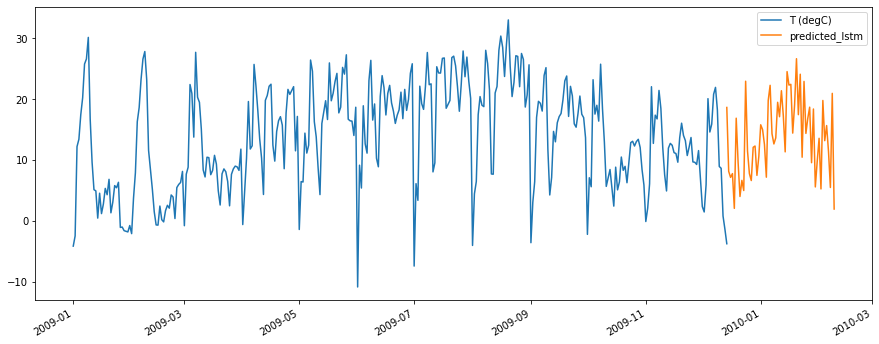

In [89]:
forecast_df[['T (degC)', 'predicted_lstm']].plot(figsize=(15, 6))

RMSE GRAPH

In [90]:
Rmse_data={"model":["Holt_Winters","SARIMA","LSTM"],"Rmse_value":[7.7,7.4,4.9]}

In [91]:
Rmse_data=pd.DataFrame(Rmse_data)
Rmse_data

,model,Rmse_value
0,Holt_Winters,7.7
1,SARIMA,7.4
2,LSTM,4.9


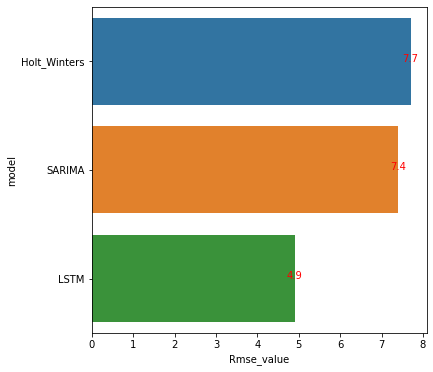

In [92]:
plt.figure(figsize=(6,6))
R=sns.barplot(x="Rmse_value",y="model",data=Rmse_data)
for index, row in Rmse_data.iterrows():
    R.text(row.Rmse_value,row.name, round(row.Rmse_value,2), color='Red', ha="center")

MAPE GRAPH

In [93]:
MAPE_data={"model":["Holt_Winters","SARIMA","LSTM"],"MAPE_value":[148,232,131]}

In [94]:
MAPE_data=pd.DataFrame(MAPE_data)
MAPE_data

,model,MAPE_value
0,Holt_Winters,148
1,SARIMA,232
2,LSTM,131


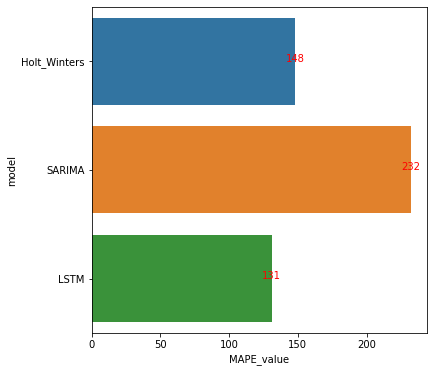

In [95]:
plt.figure(figsize=(6,6))
M=sns.barplot(x="MAPE_value",y="model",data=MAPE_data)
for index, row in MAPE_data.iterrows():
    M.text(row.MAPE_value,row.name, round(row.MAPE_value,2), color='red', ha="center")

Finally by comparing all models LSTM gives better results.

#Web Interface on LSTM using Gradio

In [96]:
def forecast_temp(no_of_samples):
  a= int(no_of_samples)*6
  new_data = df2[-(a+1):-1]
  forecast_dataset=np.array(new_data)
  forecast_dataset=forecast_dataset.reshape(-1, 1)
  X=min_max_scaler.transform(forecast_dataset)
  TimeSteps=int(6)
  NumFeatures=int(1)
  no_of_samples=int(no_of_samples)
  X=X.reshape(no_of_samples,NumFeatures,TimeSteps)
  predicted_temp = model_lstm.predict(X)
  predicted_temp = min_max_scaler.inverse_transform(predicted_temp)
  predict_df=pd.DataFrame(list(map(lambda x: x[0], predicted_temp)),columns=["predictions"])
  predict_df.reset_index(inplace=True)
  predict_df = predict_df.rename(columns = {'index':'DAYS'})
  return predict_df

In [97]:
 #plt.figure(figsize=(15, 6))
  #plt.plot(predicted_temp,color='green',label="lstm predicted Temperature")
  #plt.xlabel('Time')
  #plt.ylabel("Temperature")
  #plt.title("Lstm Prediction")
  #plt.legend()
  #plt.show()

In [98]:
forecast_temp(24)

,DAYS,predictions
0,0,21.349442
1,1,9.925673
2,2,23.878214
3,3,22.537512
4,4,22.352365
5,5,23.193394
6,6,3.100053
7,7,21.536465
8,8,12.904911
9,9,21.449614


In [101]:
! pip install gradio

     |████████████████████████████████| 865 kB 4.7 MB/s 
     |████████████████████████████████| 210 kB 61.7 MB/s 
     |████████████████████████████████| 2.0 MB 42.6 MB/s 
     |████████████████████████████████| 856 kB 41.1 MB/s 
     |████████████████████████████████| 61 kB 346 kB/s 
     |████████████████████████████████| 3.6 MB 44.2 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=15cfbd8066e727d14d901995e286b217605e183830427fee93bea225163b64fa
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3373 sha256=55edb2deebcf7e5fe300eaa1ef465efe3436703c5b35cea4116b6ab37d0ce175
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [102]:
import gradio as gr

In [103]:
interface = gr.Interface(fn = forecast_temp, inputs = 'number', outputs = "dataframe")

In [104]:
interface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://57307.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://57307.gradio.app')



---


